In [1]:
from simulations import *

In [2]:
# Specify parameters part 1
u = 20 # frequency of bursts per day
epsilon = 30 * 1e-6 # NER error rate
b = 1e2 # mean number of lesions per burst
n = 1e1 # total number of repair agents

t1one = 1/u/(np.log(b)-1)*24*60  # max detection time to deal with one burst at the time in minutes
t2max = n/u/b * 24*60 # max time of repair in minutes
print('t1={0:.2f} mins'.format(t1one))
print('t2={0:.2f} mins'.format(t2max))

t1=19.97 mins
t2=7.20 mins


In [3]:
# Specify parameters part 1 
t1 = 60 # time of detection in minutes
t2 = 1 # time of repair in minutes

r1 = 24*60/t1/n
r2 = 24*60/t2
alpha = u/(r1*n)
beta = (n*r2-u*b)/(n*r2)/b

In [4]:
# Simulate
population = np.array([0, 0, n], dtype=int)
resolution = 24*60*60 # during first and last day record every second
time_points = np.concatenate((np.linspace(0, 1, resolution),
                              np.linspace(2, 363, (365-4)*10),
                              365-1+np.linspace(0, 1, resolution)))
result = gillespie_ssa_numba(limited_capacity_model, population, time_points, (u,b,r1,r2,n,epsilon))

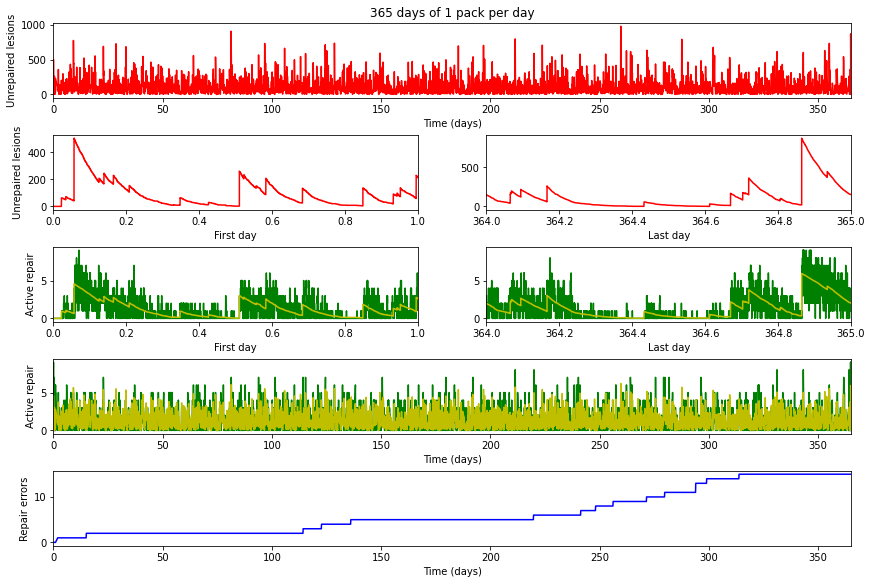

In [5]:
plot_results(time_points, result, resolution, (u,b,r1,r2,n,epsilon), title='365 days of 1 pack per day')

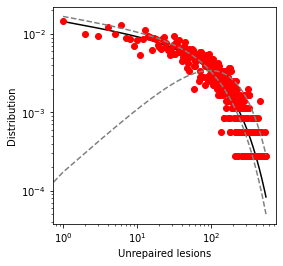

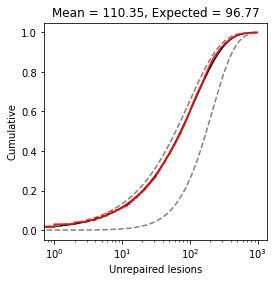

In [6]:
#plot_pmf(result, resolution, (u,b,r1,r2,n,epsilon))
plot_pmf(result, resolution, (u,b,r1,r2,n,epsilon),loglog=True)
plot_cdf(result, resolution, (u,b,r1,r2,n,epsilon))
